# Homework 3 (34 pts)

## Overview
This homework assignment will focus on exploring the spatial characteristics of Airbnb listings in Manhattan, New York City. By practicing K-means clustering, you will deepen your understanding of this method and how it can be applied in empirical studies.

## Grading
Each exercise will be graded based on the following rubrics:
- 2 points. Completed the task, presented the expected results, and codes were well documented and explained.
- 1 point. Completed the task with some disparity from the expected results.
- 0 point. Did not complete the excercise.

## Late submission policy
For late submission, every extra day after the due date will lead to 20% off of your points. Less than a day will be counted as one day. All submissions after the TA team posts the answers will not be accepted.

## 1. Read and Clean Data
### 1.1 Read and Clean Census Tract Data
Retrieving the census tract data follows the same process in Homework 2 so **ct** geodataframe is prepared for you.

In [1]:
# import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import numpy as np
import matplotlib.pyplot as plt
# from shapely.geometry import Point
%matplotlib inline
# import cenpy
from pysal.lib import weights
import contextily
from shapely.geometry import shape
#import kmeans
from sklearn.cluster import KMeans



/var/folders/c5/dps3lj6n2sz8zkk_381lj9b1hnpv4f/T/ipykernel_61685/3833414917.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [2]:
ct = pd.read_json("https://data.cityofnewyork.us/resource/63ge-mke6.json?$where=BoroName='Manhattan'")
ct['the_geom'] = ct['the_geom'].apply(shape)
ct = gpd.GeoDataFrame(ct, geometry='the_geom').set_crs(epsg = 4326)
ct.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   the_geom    310 non-null    geometry
 1   ctlabel     310 non-null    float64 
 2   borocode    310 non-null    int64   
 3   boroname    310 non-null    object  
 4   ct2020      310 non-null    int64   
 5   boroct2020  310 non-null    int64   
 6   ntaname     310 non-null    object  
 7   nta2020     310 non-null    object  
 8   cdta2020    310 non-null    object  
 9   cdtaname    310 non-null    object  
 10  geoid       310 non-null    int64   
 11  shape_leng  310 non-null    float64 
 12  shape_area  310 non-null    float64 
dtypes: float64(3), geometry(1), int64(4), object(5)
memory usage: 31.6+ KB


### 1.2 Read and Clean Airbnb Listing Data
The Airbnb listing data is also the same as Homework 2 so the geodataframe **listing** is prepared too.

In [3]:
listing_raw = pd.read_csv('http://data.insideairbnb.com/united-states/ny/new-york-city/2022-12-04/data/listings.csv.gz')
listing_raw.price = listing_raw.price.replace('[\$,]', '', regex=True).astype(float)
listing_g = gpd.GeoDataFrame(listing_raw, 
                             geometry = gpd.points_from_xy(listing_raw.longitude, 
                                                           listing_raw.latitude)).set_crs(epsg = 4326)
listing = gpd.tools.sjoin(listing_g, ct[['geoid', 'boroname', 'the_geom']], 
                          predicate="within", how='inner')
listing.info()

/var/folders/c5/dps3lj6n2sz8zkk_381lj9b1hnpv4f/T/ipykernel_61685/3524728271.py:1: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  listing_raw = pd.read_csv('http://data.insideairbnb.com/united-states/ny/new-york-city/2022-12-04/data/listings.csv.gz')


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 17333 entries, 0 to 34389
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   id                                            17333 non-null  int64   
 1   listing_url                                   17333 non-null  object  
 2   scrape_id                                     17333 non-null  int64   
 3   last_scraped                                  17333 non-null  object  
 4   source                                        17333 non-null  object  
 5   name                                          17325 non-null  object  
 6   description                                   17054 non-null  object  
 7   neighborhood_overview                         9538 non-null   object  
 8   picture_url                                   17333 non-null  object  
 9   host_id                                   

## 2. K-means Clustering
### 2.1 The Built-in K-means Clustering (16 pts)
You will use KMeans module from sklearn to find the Airbnb listing clusters based solely on the listing locations. Recall the in-class example: to prepare the proper input for KMeans function, what should be *X*? Write your code below to create *X*. (2 pts)

In [4]:
# insert your code here
#Convert listing geometries into an array of coordinate lists
X = np.array(listing[['longitude', 'latitude']])


After correctly specifying X, use the KMeans module to quickly identify the clusters. Use `random` initialization, run `100` times of K-means algorithm around each centroid and specify `n_clusters` as 10 (2 pts)

Hint: You can refer to the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) provided to learn how to add these parameters.

In [5]:
# insert your code here
kmeans = KMeans(n_clusters=10, init='random', n_init=100)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Create a plot to display your clustering results. Include the following:
- Clustered listing points, with marker size as 5. (2 pts)
- Centroids, with marker size as 10. (2 pts)
- Colored NTAs, with a grey edge color and 40% transparency. (2 pts) 

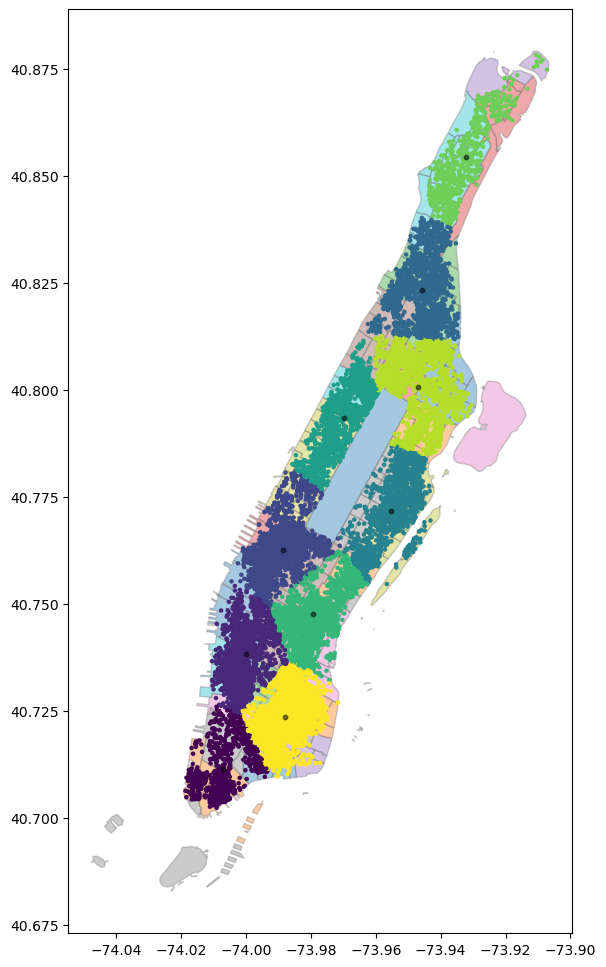

In [6]:
# insert your code here
centers = kmeans.cluster_centers_

fig,ax = plt.subplots(1,1,figsize=(12,12))
ct.plot(column = 'ntaname', alpha = 0.4, edgecolors = 'gray', ax = ax)
ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=5, cmap='viridis')
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=10, alpha=0.5)



Based on the above steps, define a function `find_cluster()` with parameters `k` with output as the clustering result plot. (2 pts)

In [7]:
def find_cluster(k_cluster):
    # insert your code here
    kmeans = KMeans(n_clusters=k_cluster, init='random', n_init=100)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_

    fig,ax = plt.subplots(1,1,figsize=(12,12));
    ct.plot(column = 'ntaname', alpha = 0.4, edgecolors = 'gray', ax = ax)
    ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=5, cmap='viridis')
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=10, alpha=0.5)
    


Use `find_cluster()` function to experiment with 5 different numbers of `k_cluster`. Present your plots below. (2 pts)

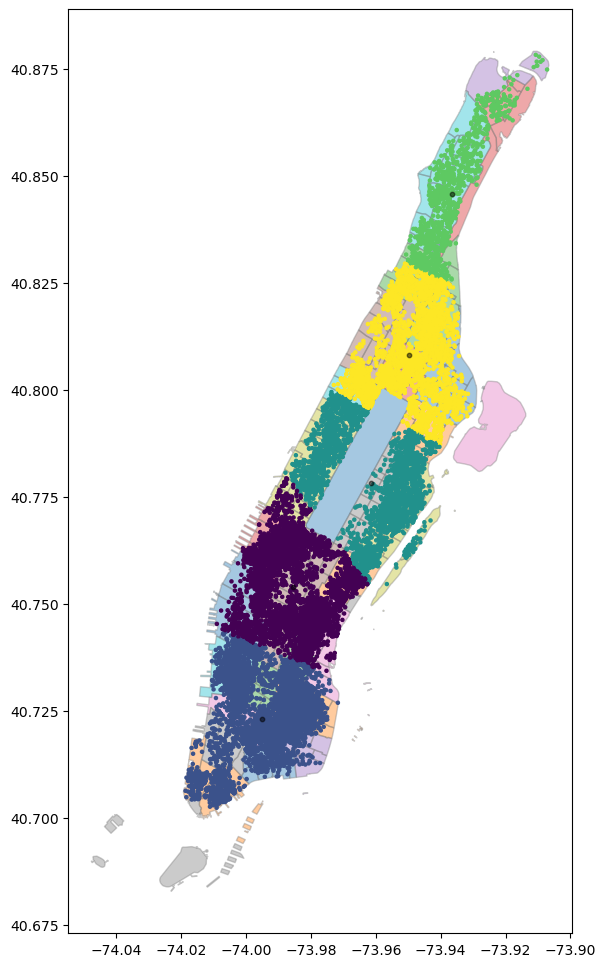

In [8]:
# insert your code here
find_cluster(5)

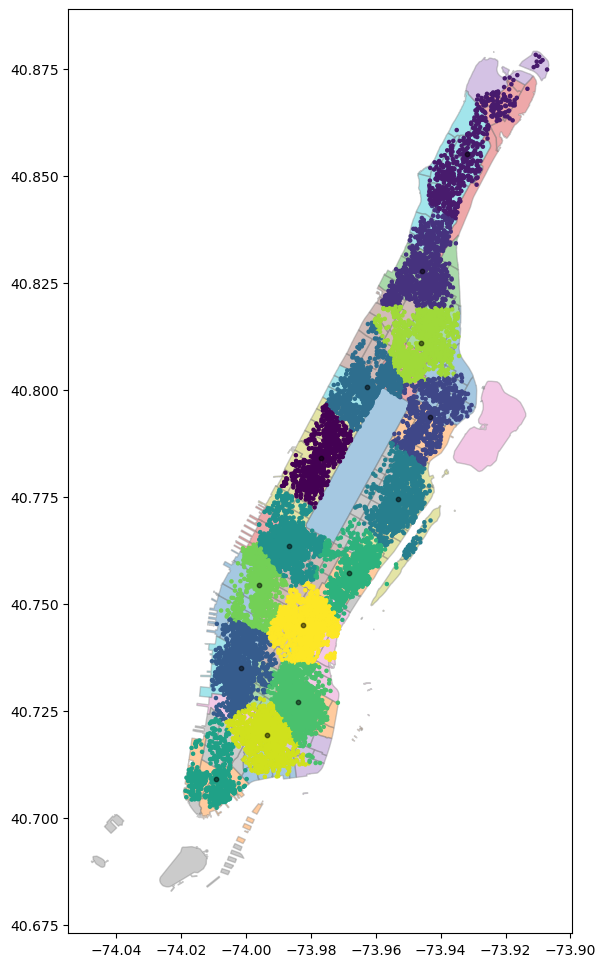

In [9]:
find_cluster(15)

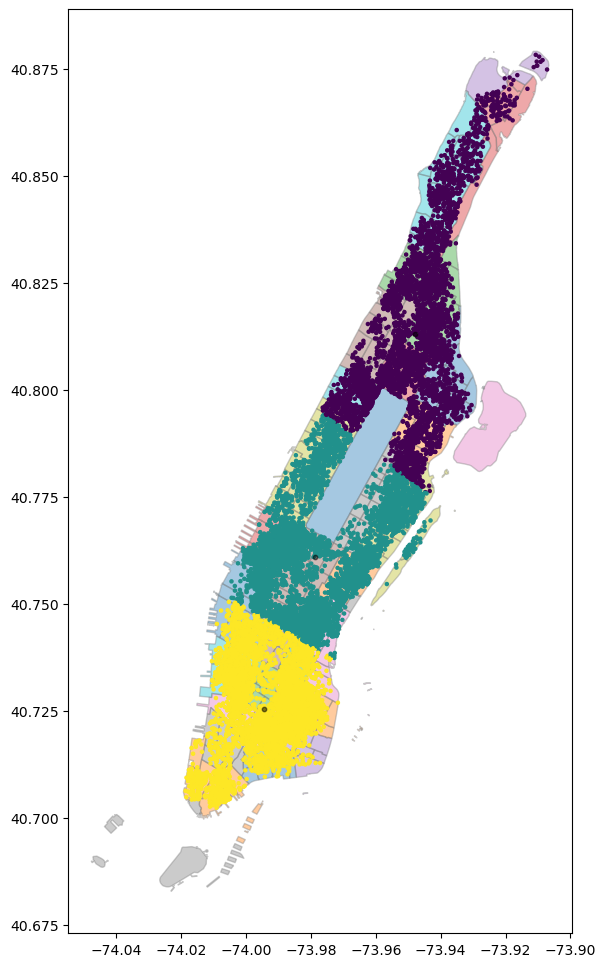

In [10]:
find_cluster(3)

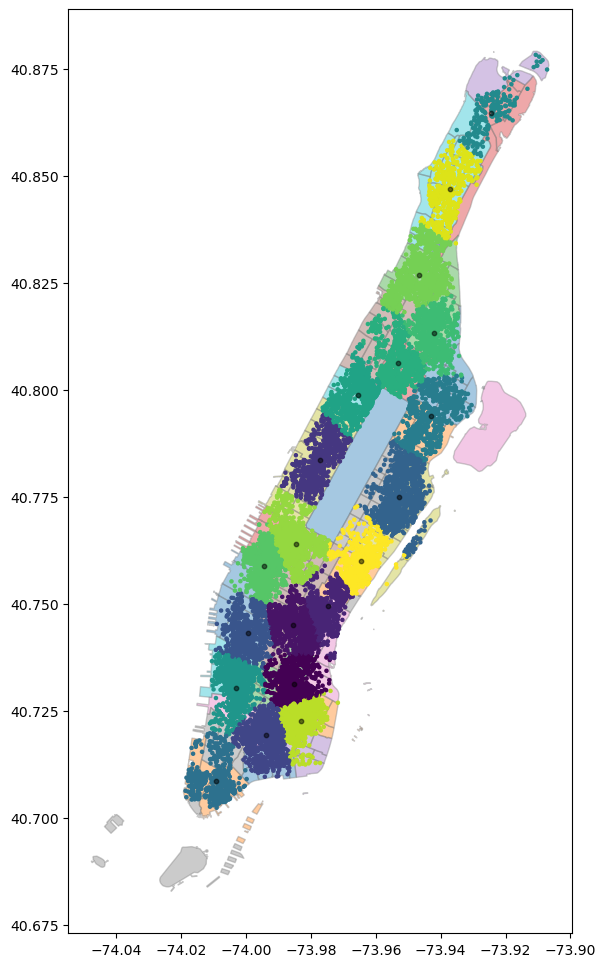

In [11]:
find_cluster(20)

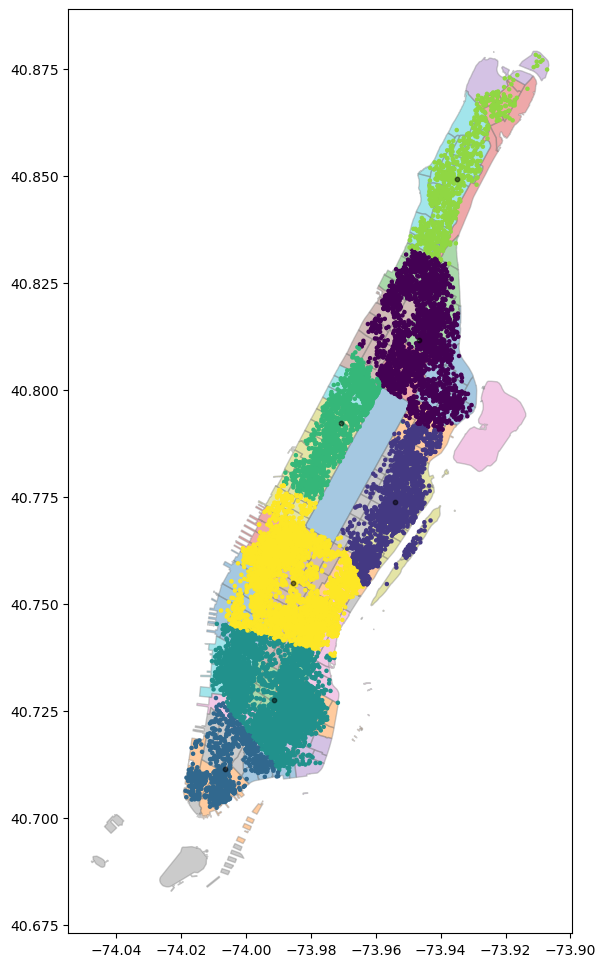

In [12]:
find_cluster(7)

Compare the 6 clustering results. How do you interpret any discrepancies among them? How does the number of clusters influence the results? Also, discuss the implications of these results for future analyses that use the K-means algorithm. (2 pts)

Use markdown to write your answer.

K-Means is a distance-based clustering algorithm, attempting to minimize the distance between points and its cluster's centroids. Depending your initial definition of k, resulting clusters will have different areas and shapes, and will determine how your data is spatially divided. Therefore, selecting k must be relevant to your question of interest and be determined beforehand, as these cluster areas will determine how you interpret the data. Increasing the number of clusters further the divides the data into spherical-like clusters with distinct, linear boundaries. All points belong to a cluster, and no points are excluded, meaning outliers in the data are not differentiated. 

### 2.2  Density-based Clustering Algorithm (DBSCAN) (18 pts)
Next, you will use DBSCAN algorithm to the same listing dataset and explore the difference between DBSCAN and K-means.

To conduct DBSCAN, you first need to specify `eps` and `min_samples` parameters. `eps` refers to the maximum distance between two samples for one to be considered as in the neighborhood of the other in radians rather than kilometers. Use the given equation to transform 8 kilometers into radians. 

`min_samples` refers to the number of samples (or total weight) in a neighborhood for a point to be considered as a core point. You will use 20 listings in this exercise as the minimum number of samples. (2 pts)

Hint: more details on DBSCAN can be found in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html). 

In [32]:
import pointpats
from sklearn.cluster import DBSCAN
import seaborn as sns
import contextily as ctx

# def find_clusters(listing, eps_km, weights = None, name = None):
km = 8
#convert to radians
epsilon = km / 6371.0088

minp = 20

Use `epsilon` and `minp` in the previous step for the DBSCAN function. Specify sample weight as the `price` in listing. Next, add the cluster labels to listing as a new column `lbls`. (2 pts)

In [33]:
# insert your code here
clusterer = DBSCAN(eps = epsilon, min_samples=minp)
#fit data
#eps is in radians, so coordinates should be in radians as well
#to calculate accurate distances
clusterer.fit(np.radians(X), sample_weight = listing['price'])
#add cluster labels to listing
lbls = pd.Series(clusterer.labels_, index=listing.index)
listing['lbls'] = lbls


How many clusters have been classified? (2 pts)

In [34]:
# insert your code here
n_clusters = len(set(clusterer.labels_)) - (1 if -1 in clusterer.labels_ else 0)
print("Estimated number of clusters: %d" % n_clusters)


Estimated number of clusters: 1


Plot the clustering results. Please include:
- The unclassified points (noise) in grey and size as 5. (2 pts)
- The clustered points in different colors and size as 10 (hint: check the [seaborn.scatterplot documentation](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) and specify parameter *hue* as `lbls`). Make sure to turn `lbls` into strings so that they are not read as continuous variables (2 pts)
- Base map and title. (2 pts)

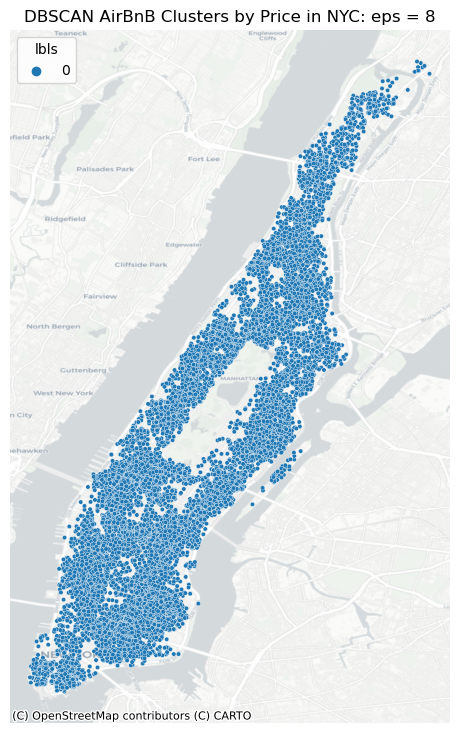

In [35]:
# insert your code here
f, ax = plt.subplots(1, figsize=(9, 9))
#subset noise data from listing
noise = listing.loc[lbls == -1, ["longitude", "latitude"]]
# Plot noise in grey
ax.scatter(noise["longitude"], noise["latitude"], c="grey", s=5)
sns.scatterplot( x = listing.loc[listing.index.difference(noise.index), "longitude"], y = listing.loc[listing.index.difference(noise.index), "latitude"],
                 hue = listing.loc[listing.index.difference(noise.index), "lbls"].astype(str), s = 10, ax = ax)
# Add basemap
ctx.add_basemap(
    ax, source=ctx.providers.CartoDB.Positron, crs="EPSG:4326"
)

# Remove axes
ax.set_axis_off()
#Add title
plt.title("DBSCAN AirBnB Clusters by Price in NYC: eps = 8")
# Display the figure
plt.show()

Try a different `epsilon` with everything else the same. Plot your results in the same format. (2 pts)

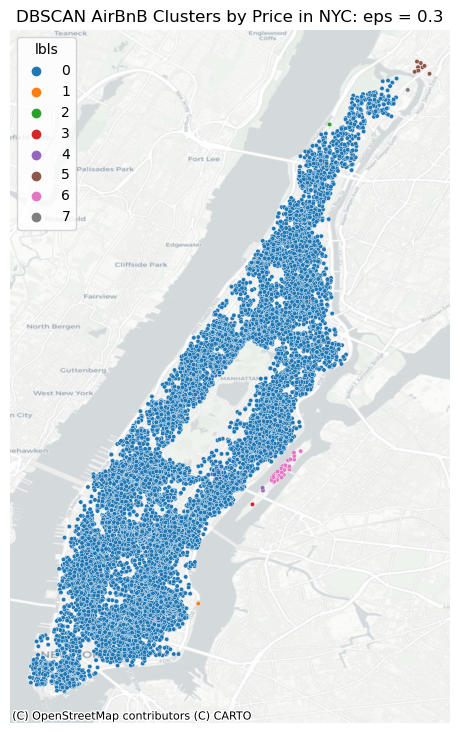

In [31]:
km = 0.3
epsilon = km / 6371.0088
minp = 20

clusterer = DBSCAN(eps = epsilon, min_samples=minp)
#fit data
clusterer.fit(np.radians(X), sample_weight = listing['price'])
#add cluster labels to listing
lbls = pd.Series(clusterer.labels_, index=listing.index)
listing['lbls'] = lbls


f, ax = plt.subplots(1, figsize=(9, 9))
#subset noise data from listing
noise = listing.loc[lbls == -1, ["longitude", "latitude"]]
# Plot noise in grey
ax.scatter(noise["longitude"], noise["latitude"], c="grey", s=5, linewidth=0)
sns.scatterplot( x = listing.loc[listing.index.difference(noise.index), "longitude"], y = listing.loc[listing.index.difference(noise.index), "latitude"],
                 hue = listing.loc[listing.index.difference(noise.index), "lbls"].astype(str), s = 10, ax = ax)
# Add basemap
ctx.add_basemap(
    ax, source=ctx.providers.CartoDB.Positron, crs="EPSG:4326"
)
# Remove axes
ax.set_axis_off()
#Create title
plt.title("DBSCAN AirBnB Clusters by Price in NYC: eps = 0.3")
# Display the figure
plt.show()


Compare the two DBSCAN results obtained using different epsilon values and determine which one is a better reflection of the neighborhoods in Manhattan. Discuss the implications of your findings for future DBSCAN analyses. (2 pts) Use a markdown for your answer.

Both DBSCAN results group the majority of points into a single cluster, so neither are a good reflection of neighborhoods in Manhattan. This could be because the points are already so dense within Manhattan, so it is easy for the algorithm to identify core points and group them together. The clusters of listings are probably of different densities, but we are only defining our clusters based on one set of parameters, making it difficult to identify clusters of different densities. DBSCAN is highly sensitive to the eps and min_sample parameters, as this determines the number and size of the clusters. Dropping eps to 0.3 creates new clusters of different sizes, which could be interpreted as outliers in the data. One aspect that I was uncertain about is the connection between the units of eps and the units of the coordinates of interest. Our spatial data of interest is plotted in degrees, but our eps parameter is measured in radians. I assumed that DBSCAN should be fitted to a coordinate array in radians since the euclidean distance calculated between points will also be in radians. Another thing to note is that the min_sample parameter will determine which points are marked as noise and which are labelled as core points, particularly if adding a weight array to the fit. Based on the documentation for the DBSCAN fit function, samples with a weight of at least min_samples will be defined as a core point. Since most listings have a price above 20, they will automatically be considered a core point. This could potentially be a reason for why the listings are within one cluster. 

Compare the clustering results obtained in section 2.1 and 2.2. List several pros and cons of the two K-Means implementation methods. (2 pts) Use a markdown for your answer.

There are pros and cons for using K-Means and DBSCAN for clustering purposes. K-Means requires you to define the number of clusters beforehand, while DBSCAN does not require the number of clusters to be defined a priori and will create as many clusters as the algorithm calculates. K-Means will cluster all points, but DBSCAN will identify points as noise if it can not be associated with a cluster. K-Means clustering is also influenced by outliers in the data, while DBSCAN is not. However, clustering in DBSCAN is highly sensitive to the initially defined eps and min_samples parameters. It can also be hard to define these parameters if you don't have a good context for the data you are using. Additionally, DBSCAN has issues if clusters are of different densities, while K-Means can create clusters of different densities. Overall, if you are wanting to identify clusters based on pre-existing boundaries (such as neighborhoods or census tracts), and you know roughly how many clusters you want, K-means is a good algorithm for this purpose. On the other hand, if you are not familiar with the spatial distribution of the data, nor do you have a sense of how many clusters are sensible for your variable of interest, DBSCAN is a good algorithm to use. 